In [2]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [4]:
forest=pd.read_csv('forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
forest.shape

(517, 31)

In [6]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
forest.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [8]:
forest[forest.duplicated()].shape

(8, 31)

In [9]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
forest1=forest.drop_duplicates()
forest1.shape

(509, 31)

In [11]:
forest1.corr()

<ipython-input-11-38c6f298440b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  forest1.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.136614,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.177044,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.106347,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.162761,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.329774,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,-0.047670,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,0.270919,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.009262,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,0.000706,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,-0.018868,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903


In [12]:
forest1.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
forest1['month']=label_encoder.fit_transform(forest1['month'])
forest1['day']=label_encoder.fit_transform(forest1['day'])
forest1['size_category']=label_encoder.fit_transform(forest1['size_category'])

<ipython-input-13-829c7000de59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest1['month']=label_encoder.fit_transform(forest1['month'])
<ipython-input-13-829c7000de59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest1['day']=label_encoder.fit_transform(forest1['day'])
<ipython-input-13-829c7000de59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

<Axes: >

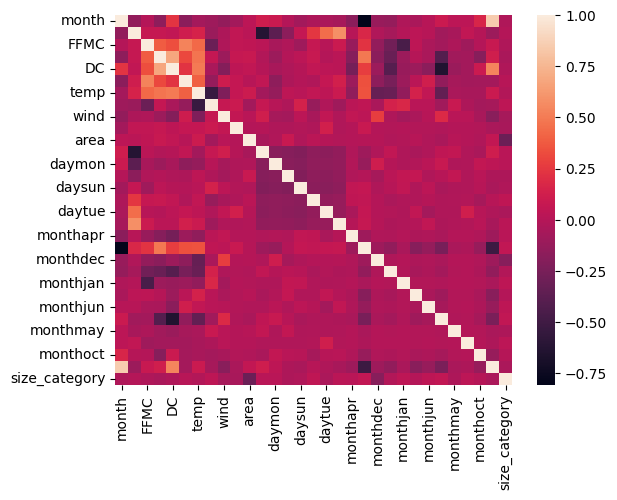

In [14]:
import seaborn as sns
sns.heatmap(forest1.corr())

In [15]:
x=forest1.iloc[:,0:30]
y=forest1.iloc[:,30]

In [16]:
##Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)


In [17]:
fires = norm_func(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((407, 30), (407,), (102, 30), (102,))

In [20]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int64

In [22]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [23]:
pred_test_linear = model_linear.predict(x_test)

In [24]:
np.mean(pred_test_linear==y_test)

0.9901960784313726

In [25]:
acc = accuracy_score(y_test, pred_test_linear) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_linear)

Accuracy = 99.01960784313727


array([[28,  1],
       [ 0, 73]])

In [26]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [27]:
pred_test_poly = model_poly.predict(x_test)

In [28]:
np.mean(pred_test_poly==y_test)


0.7941176470588235

In [29]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [30]:
pred_test_rbf = model_rbf.predict(x_test)

In [31]:
np.mean(pred_test_rbf==y_test)

0.7843137254901961

In [32]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [33]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [34]:
pred_test_sig = model_rbf.predict(x_test)

In [35]:
np.mean(pred_test_sig==y_test)

0.7843137254901961

In [37]:
# SALARY DATA - TEST AND TRAIN


In [38]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [39]:
from google .colab import files
uploaded= files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [41]:
salary_test=pd.read_csv('/content/SalaryData_Test(1).csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [42]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [43]:
salary_test.shape

(15060, 14)

In [44]:
salary_test.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [45]:
salary_test[salary_test.duplicated()].shape

(930, 14)

In [46]:
salary_test[salary_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [47]:
salary_test1=salary_test.drop_duplicates()
salary_test1.shape

(14130, 14)

In [48]:
salary_test1.corr()

<ipython-input-48-bb96f974bded>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  salary_test1.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.021979,0.076765,0.053172,0.088090
educationno,0.021979,1.000000,0.132346,0.085651,0.127779
capitalgain,0.076765,0.132346,1.000000,-0.033929,0.089512
capitalloss,0.053172,0.085651,-0.033929,1.000000,0.056353
hoursperweek,0.088090,0.127779,0.089512,0.056353,1.000000


In [49]:
salary_test1['workclass']=salary_test1['workclass'].astype('category')
salary_test1['education']=salary_test1['education'].astype('category')
salary_test1['maritalstatus']=salary_test1['maritalstatus'].astype('category')
salary_test1['occupation']=salary_test1['occupation'].astype('category')
salary_test1['relationship']=salary_test1['relationship'].astype('category')
salary_test1['race']=salary_test1['race'].astype('category')
salary_test1['sex']=salary_test['sex'].astype('category')
salary_test1['native']=salary_test1['native'].astype('category')

<ipython-input-49-fba011e78d85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test1['workclass']=salary_test1['workclass'].astype('category')
<ipython-input-49-fba011e78d85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test1['education']=salary_test1['education'].astype('category')
<ipython-input-49-fba011e78d85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [50]:
from sklearn import preprocessing
label_encoder =preprocessing.LabelEncoder()

In [51]:
salary_test1['Salary']=label_encoder.fit_transform(salary_test1['Salary'])
salary_test1['workclass']=label_encoder.fit_transform(salary_test1['workclass'])
salary_test1['education']=label_encoder.fit_transform(salary_test1['education'])
salary_test1['maritalstatus']=label_encoder.fit_transform(salary_test1['maritalstatus'])
salary_test1['occupation']=label_encoder.fit_transform(salary_test1['occupation'])
salary_test1['relationship']=label_encoder.fit_transform(salary_test1['relationship'])
salary_test1['race']=label_encoder.fit_transform(salary_test1['race'])
salary_test1['sex']=label_encoder.fit_transform(salary_test1['sex'])
salary_test1['native']=label_encoder.fit_transform(salary_test1['native'])

<ipython-input-51-2c18131331c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test1['Salary']=label_encoder.fit_transform(salary_test1['Salary'])
<ipython-input-51-2c18131331c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test1['workclass']=label_encoder.fit_transform(salary_test1['workclass'])
<ipython-input-51-2c18131331c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

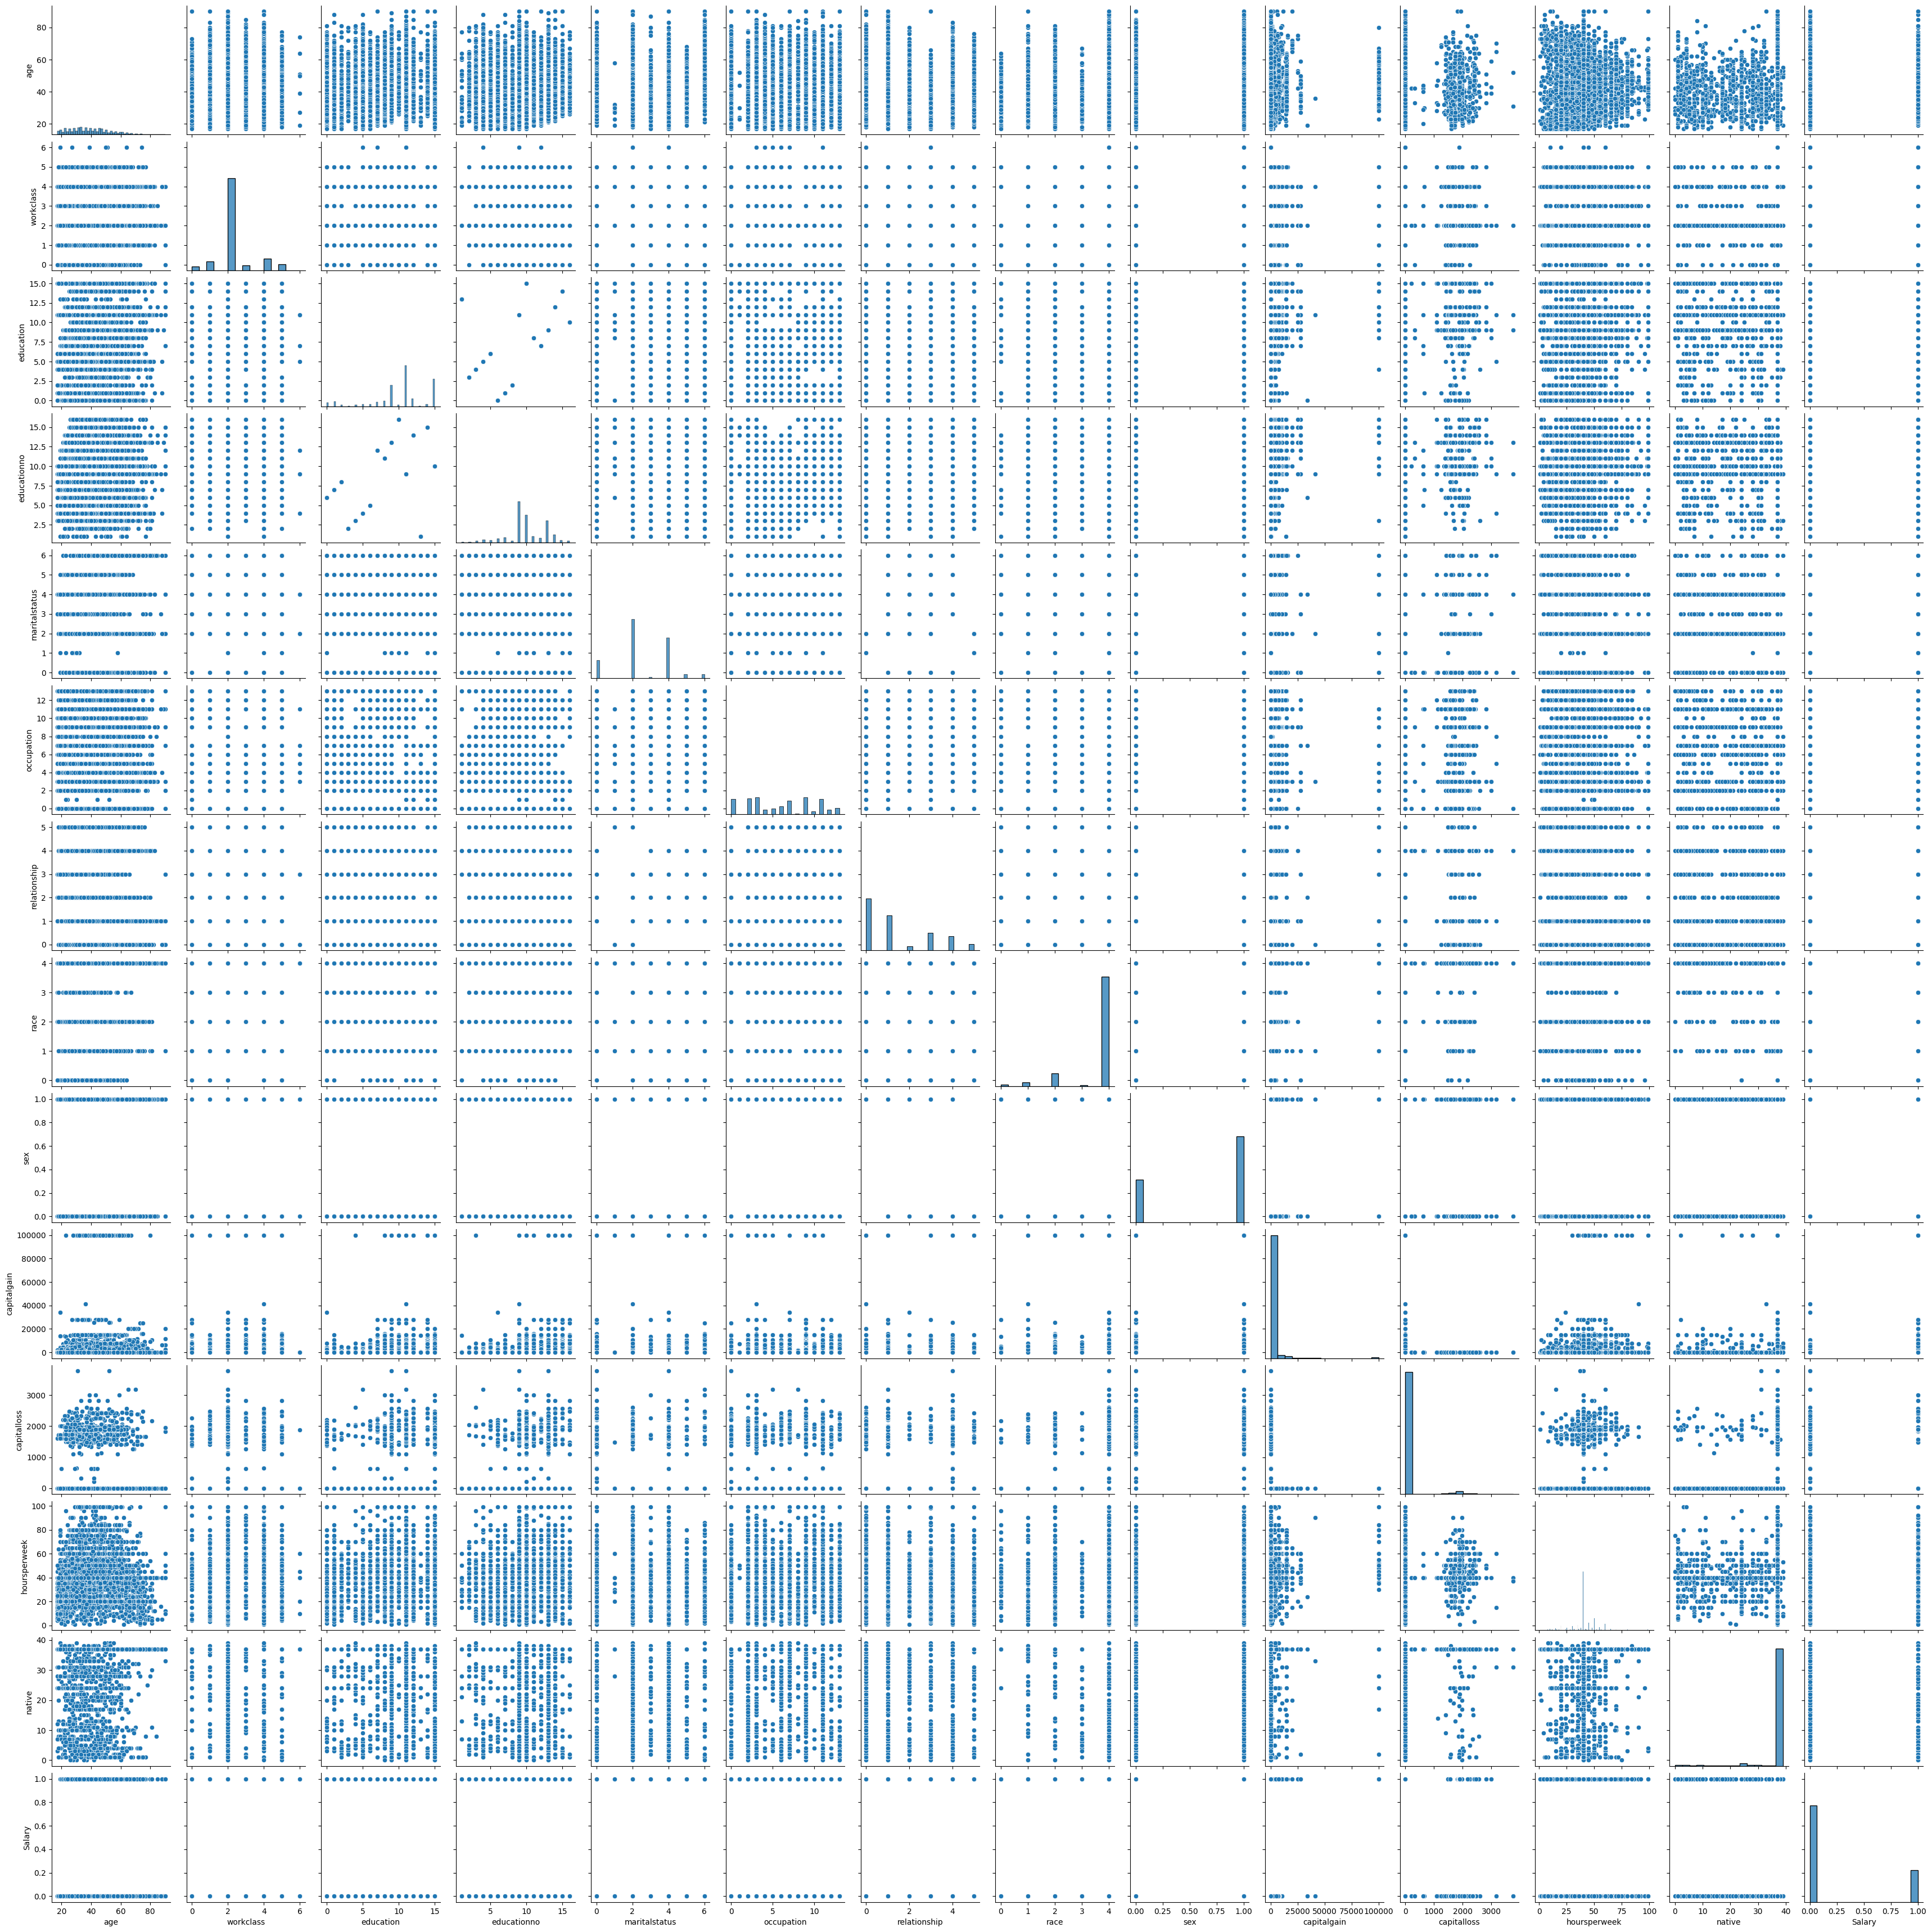

In [52]:
import seaborn as sns
sns.pairplot(salary_test1)

<Axes: >

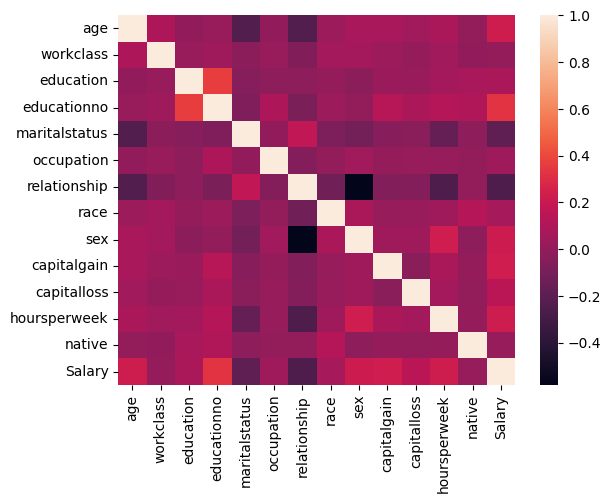

In [53]:
sns.heatmap(salary_test1.corr())

In [54]:
x=salary_test1.iloc[:,0:13]
y=salary_test1.iloc[:,13]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [57]:
y

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 14130, dtype: int64

In [58]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11304, 13), (11304,), (2826, 13), (2826,))

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf = LogisticRegression()

In [64]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
Y_pred = clf.predict(x_test)
Y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
clf=SVC()
clf.fit(x_train , y_train)
Y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, Y_pred)

Accuracy = 79.54706298655343


array([[2044,   77],
       [ 501,  204]])

# Training dataset

In [68]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [70]:
salary_train=pd.read_csv('/content/SalaryData_Train(1).csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
salary_train.shape

(30161, 14)

In [72]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [73]:
salary_train[salary_train.duplicated()].shape

(3258, 14)

In [74]:
salary_train1=salary_train.drop_duplicates()
salary_train1.shape

(26903, 14)

In [75]:
salary_train1['workclass']=salary_train1['workclass'].astype('category')
salary_train1['education']=salary_train1['education'].astype('category')
salary_train1['maritalstatus']=salary_train1['maritalstatus'].astype('category')
salary_train1['occupation']=salary_train1['occupation'].astype('category')
salary_train1['relationship']=salary_train1['relationship'].astype('category')
salary_train1['race']=salary_train1['race'].astype('category')
salary_train1['sex']=salary_train['sex'].astype('category')
salary_train1['native']=salary_train1['native'].astype('category')

<ipython-input-75-72f66f96538b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train1['workclass']=salary_train1['workclass'].astype('category')
<ipython-input-75-72f66f96538b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train1['education']=salary_train1['education'].astype('category')
<ipython-input-75-72f66f96538b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [76]:
salary_train1['Salary']=label_encoder.fit_transform(salary_train1['Salary'])
salary_train1['workclass']=label_encoder.fit_transform(salary_train1['workclass'])
salary_train1['education']=label_encoder.fit_transform(salary_train1['education'])
salary_train1['maritalstatus']=label_encoder.fit_transform(salary_train1['maritalstatus'])
salary_train1['occupation']=label_encoder.fit_transform(salary_train1['occupation'])
salary_train1['relationship']=label_encoder.fit_transform(salary_train1['relationship'])
salary_train1['race']=label_encoder.fit_transform(salary_train1['race'])
salary_train1['sex']=label_encoder.fit_transform(salary_train1['sex'])
salary_train1['native']=label_encoder.fit_transform(salary_train1['native'])

<ipython-input-76-00b024f3ad1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train1['Salary']=label_encoder.fit_transform(salary_train1['Salary'])
<ipython-input-76-00b024f3ad1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train1['workclass']=label_encoder.fit_transform(salary_train1['workclass'])
<ipython-input-76-00b024f3ad1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [77]:
salary_train1.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.075184,0.002717,0.038048,-0.245062,-0.004570,-0.231111,0.040457,0.070434,0.077235,0.052684,0.072529,0.010626,0.223502
workclass,0.075184,1.000000,0.021289,0.037806,-0.031961,0.014047,-0.070996,0.051479,0.079380,0.033217,0.002739,0.047169,0.012683,0.016577
education,0.002717,0.021289,1.000000,0.359940,-0.040931,-0.025890,-0.010801,0.005572,-0.029841,0.034550,0.020469,0.058709,0.076605,0.090094
educationno,0.038048,0.037806,0.359940,1.000000,-0.066536,0.084300,-0.092236,0.035215,0.010941,0.126085,0.080025,0.145491,0.096279,0.332178
maritalstatus,-0.245062,-0.031961,-0.040931,-0.066536,1.000000,0.015094,0.155553,-0.073628,-0.108928,-0.042087,-0.033890,-0.175692,-0.029585,-0.184559
occupation,-0.004570,0.014047,-0.025890,0.084300,0.015094,1.000000,-0.063950,0.008183,0.066919,0.019724,0.010873,0.023073,0.003024,0.050711
relationship,-0.231111,-0.070996,-0.010801,-0.092236,0.155553,-0.063950,1.000000,-0.113708,-0.586804,-0.063322,-0.070351,-0.248745,-0.006126,-0.247438
race,0.040457,0.051479,0.005572,0.035215,-0.073628,0.008183,-0.113708,1.000000,0.085786,0.020049,0.032111,0.056460,0.118907,0.079109
sex,0.070434,0.079380,-0.029841,0.010941,-0.108928,0.066919,-0.586804,0.085786,1.000000,0.053490,0.053084,0.228767,-0.004930,0.217360
capitalgain,0.077235,0.033217,0.034550,0.126085,-0.042087,0.019724,-0.063322,0.020049,0.053490,1.000000,-0.036023,0.079403,0.012902,0.228865


In [78]:
salary_train1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,2.217597,10.254135,10.144296,2.563394,6.053674,1.449578,3.645950,0.667621,1215.443259,98.427499,41.164591,35.228711,0.255734
std,13.188825,0.996802,3.864670,2.620154,1.528599,4.026816,1.618758,0.871165,0.471075,7805.366384,425.493211,12.347051,6.272069,0.436281
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,2.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,38.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,1.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


<Axes: >

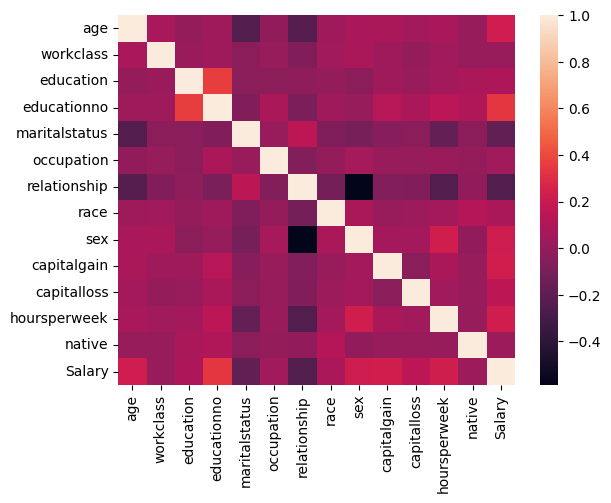

In [79]:
sns.heatmap(salary_train1.corr())

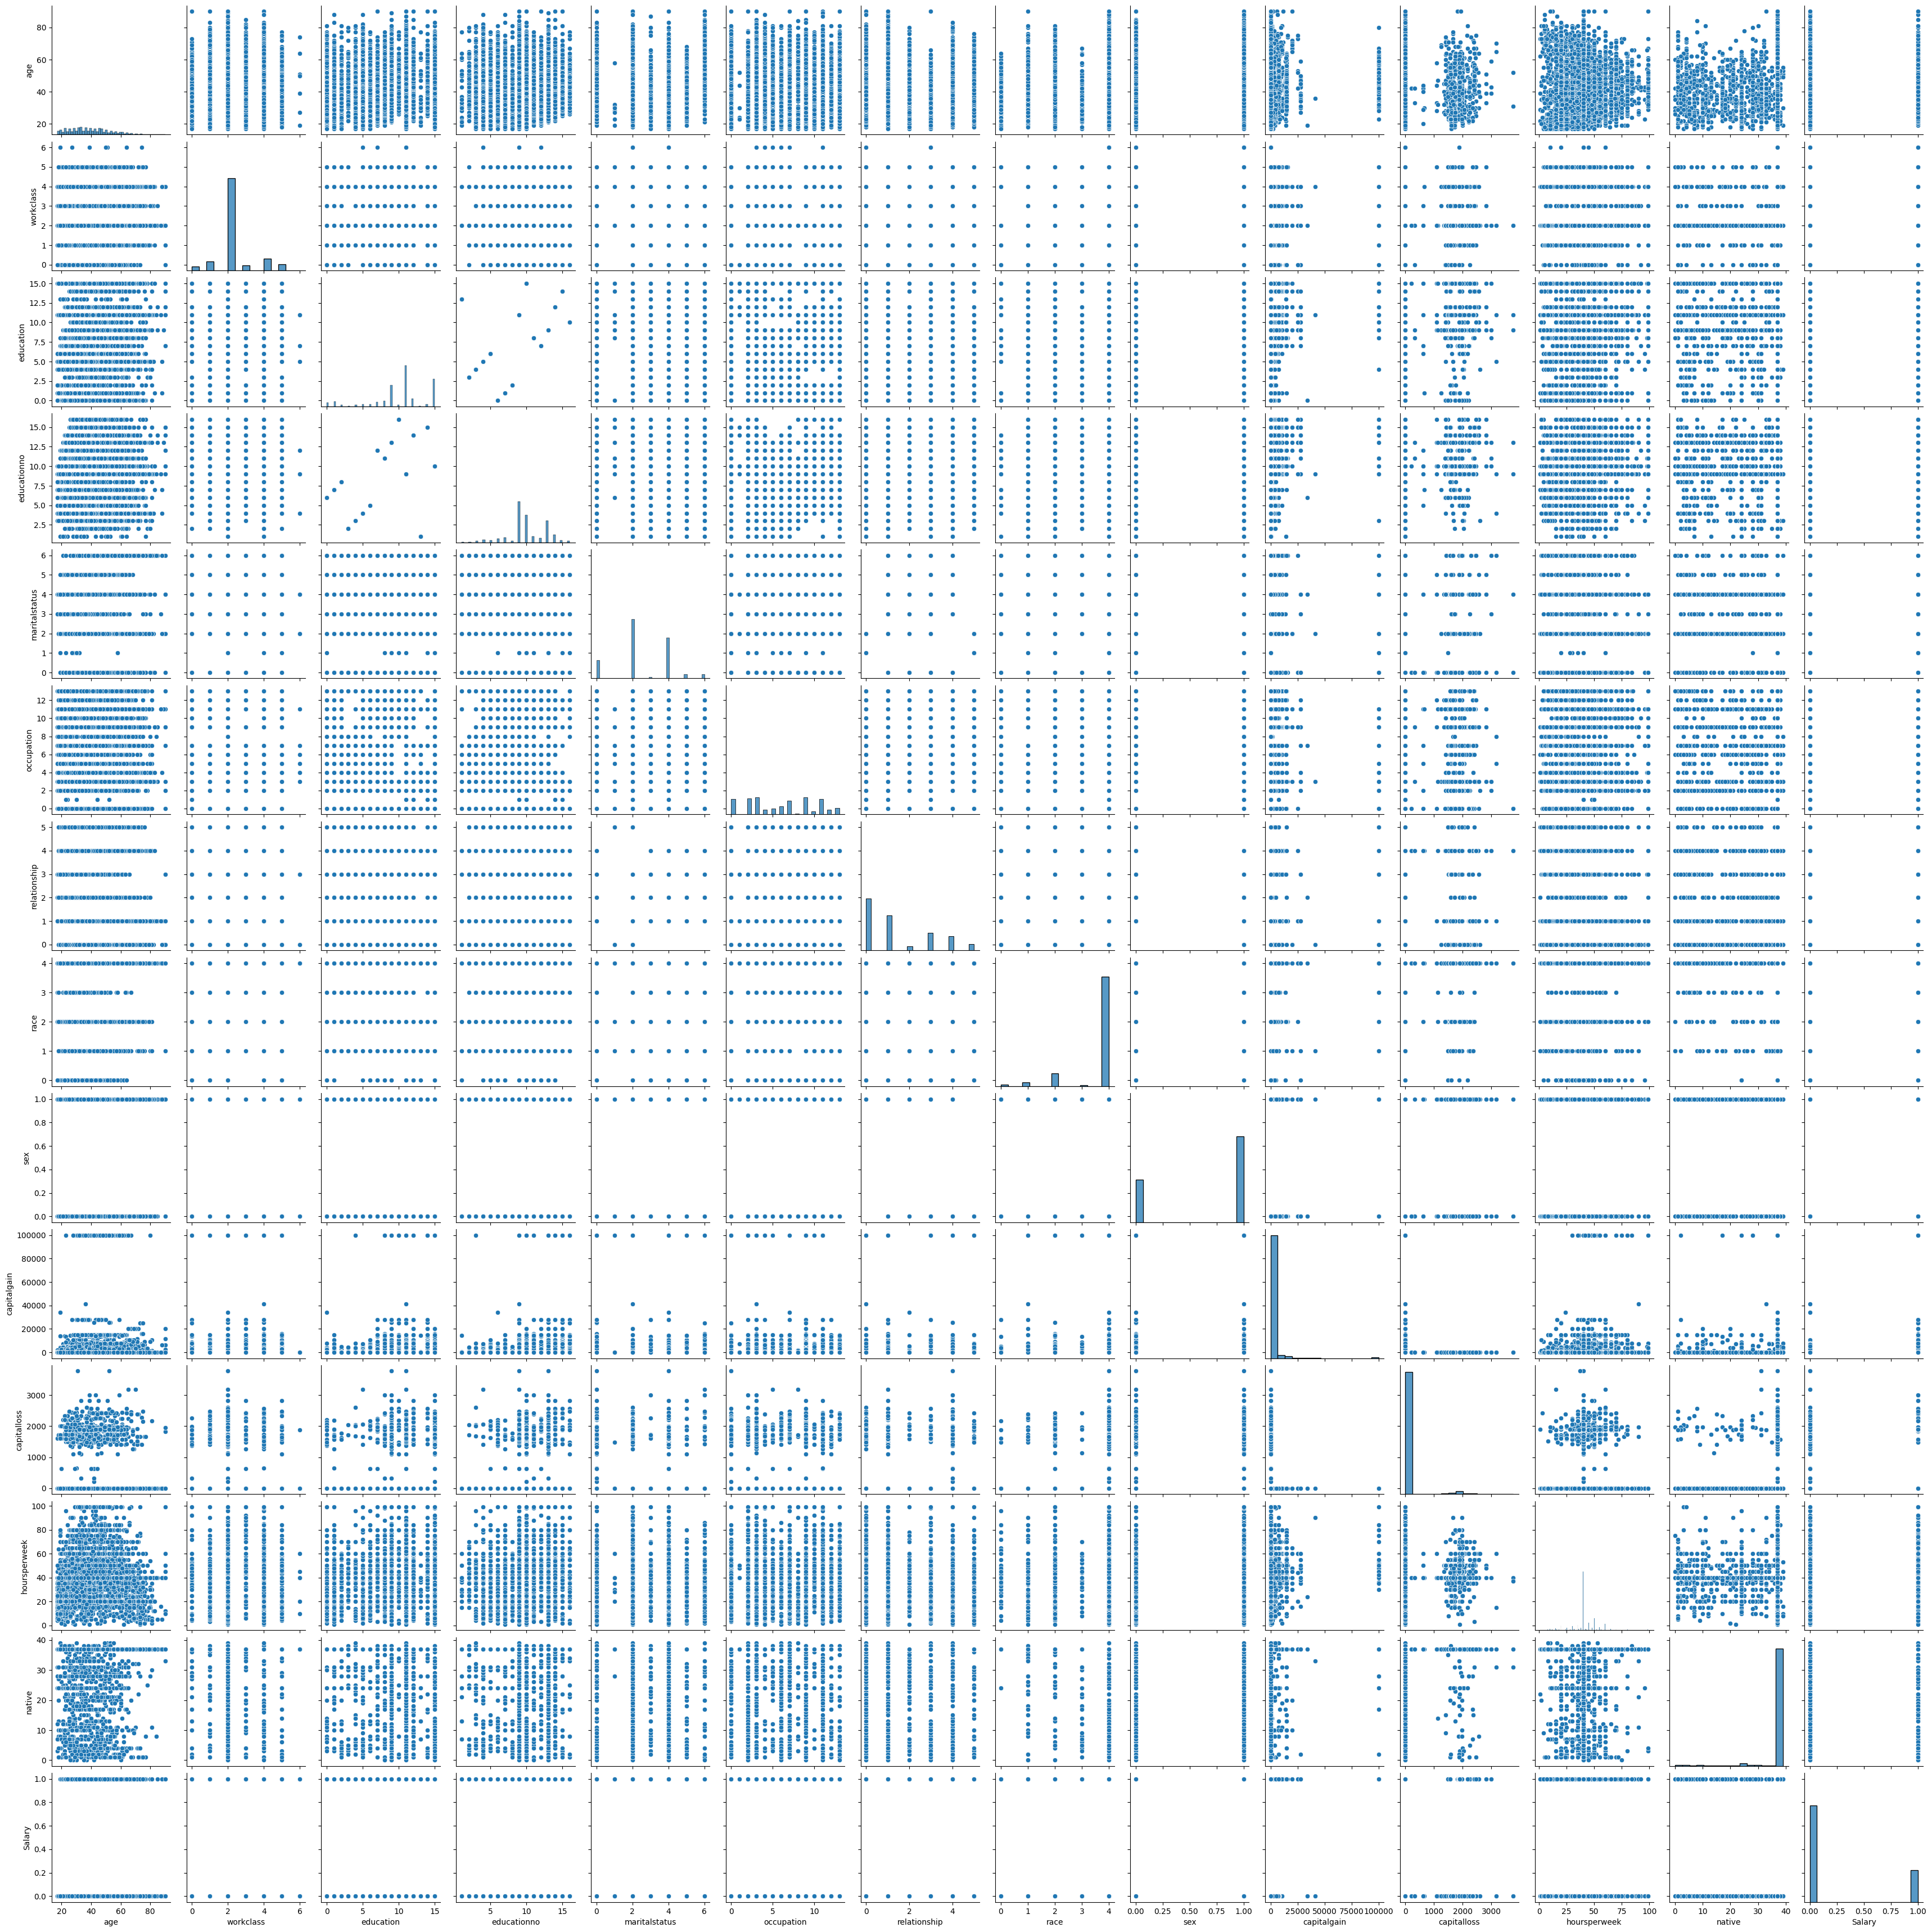

In [80]:
sns.pairplot(salary_test1)

In [81]:
X=salary_train1.iloc[:,0:13]
Y=salary_train1.iloc[:,13]

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [83]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37
30155,22,2,15,10,4,10,1,4,1,0,0,40,37
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37


In [84]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 26903, dtype: int64

In [85]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
clf=SVC()
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 79.76212599888497


array([[3887,  145],
       [ 944,  405]])

In [87]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])